# Comparing Different Approaches to Breast Cancer Ultrasound Diagnosis using Deep Learning


## Team Members
- Samantha Guillemette - ID: 26609198
- Saleha Tariq - ID: 40006997

# Librairies

In [67]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Data Visualization

In [68]:
train_path= 'data/ultrasound breast classification/train'
test_path='data/ultrasound breast classification/val'

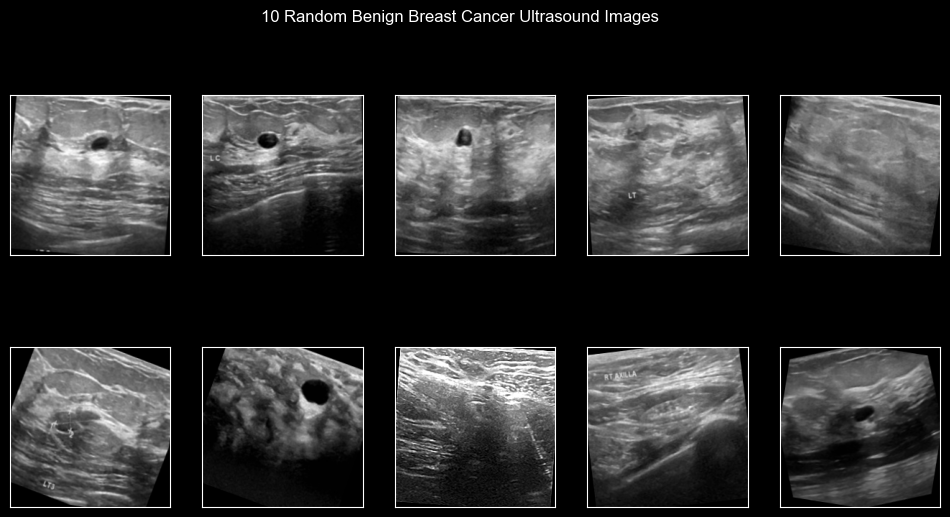

In [69]:
folder = train_path +"/benign"
data = os.listdir(folder)
random_images = random.sample(data, 10)

images = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image = os.path.join(folder, random_images[i])
    img = plt.imread(image)
    images.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Benign Breast Cancer Ultrasound Images")
plt.show()

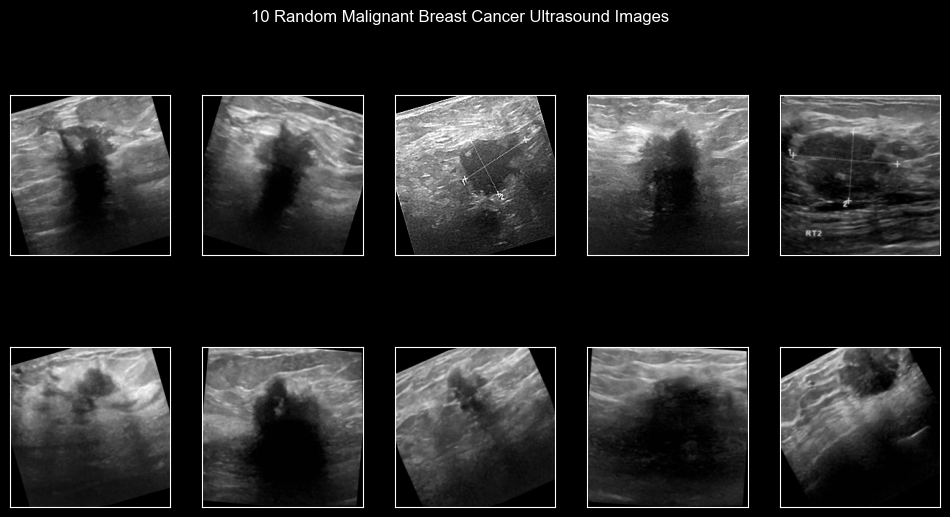

In [70]:
folder = train_path+"/malignant"
data = os.listdir(folder)
random_images = random.sample(data, 10)

images = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image = os.path.join(folder, random_images[i])
    img = plt.imread(image)
    images.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Malignant Breast Cancer Ultrasound Images")
plt.show()

# Data preparation & pre-processing

### Load Image Files for Training and Testing

In [71]:
image_types = [".png", ".jpg"]

# Get training list of files
train_benign = os.path.join(train_path, "benign")
training_benign_files = [os.path.join(train_benign, f) for f in os.listdir(train_benign) if os.path.splitext(f)[1].lower() in image_types]
train_malignant= os.path.join(train_path, "malignant")
train_malignant_files = [os.path.join(train_malignant, f) for f in os.listdir(train_malignant) if os.path.splitext(f)[1].lower() in image_types]

# Training sets
X_train = training_benign_files + train_malignant_files
y_train = np.concatenate([np.ones(len(training_benign_files)), np.zeros(len(train_malignant_files))])

# Get testing list of files
test_benign = os.path.join(test_path, "benign")
test_benign_files = [os.path.join(test_benign, f) for f in os.listdir(test_benign) if os.path.splitext(f)[1].lower() in image_types]
test_malignant= os.path.join(test_path, "malignant")
test_malignant_files = [os.path.join(test_malignant, f) for f in os.listdir(test_malignant) if os.path.splitext(f)[1].lower() in image_types]

# Testing sets
X_test = training_benign_files + train_malignant_files
y_test = np.concatenate([np.ones(len(test_benign_files)), np.zeros(len(test_malignant_files))])


### Training and Testing Set Visualization

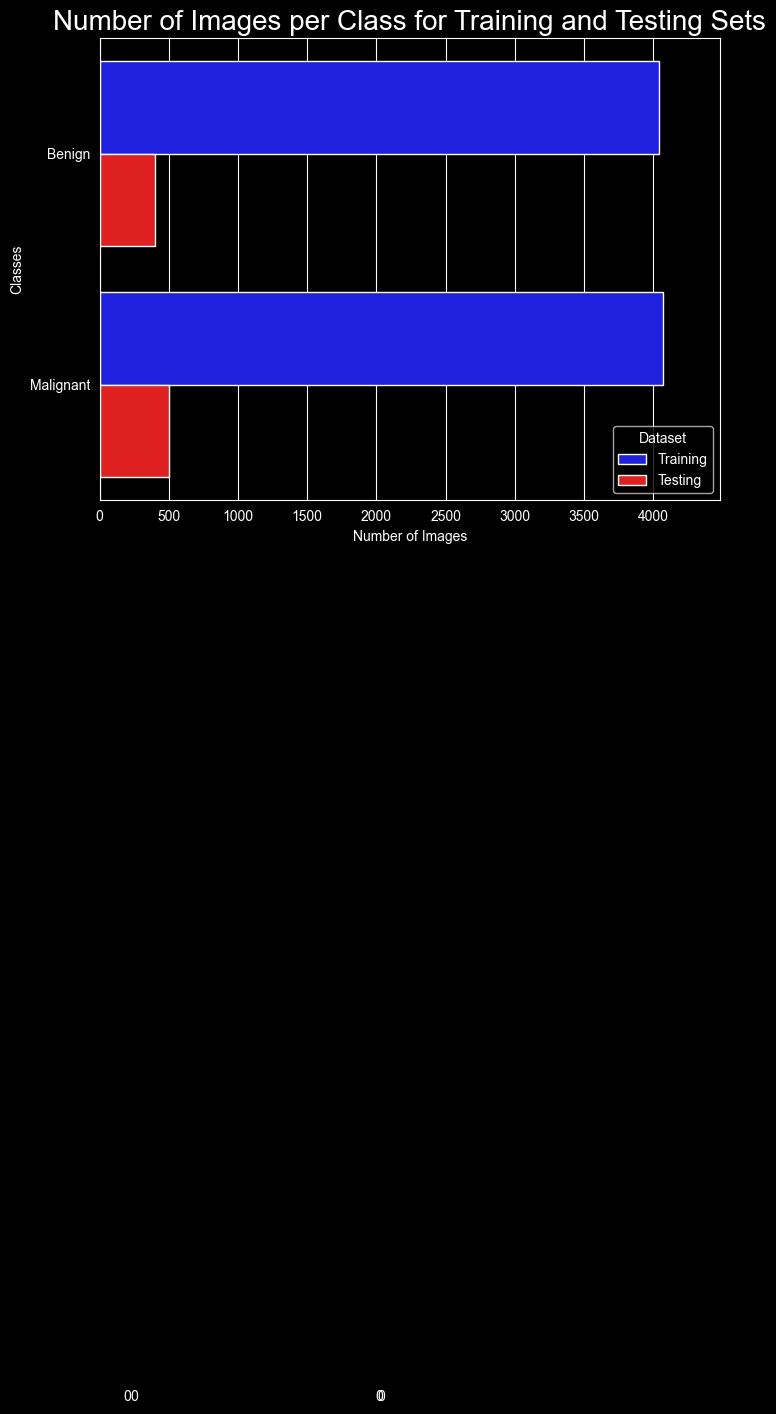

In [72]:
#Counts for Training and Testing sets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)


counts_df = pd.DataFrame({
    "Class": ["Benign", "Malignant"],
    "Training": train_counts[1],
    "Testing": test_counts[1]
})

# Data melting
counts_melt = counts_df.melt(id_vars=["Class"], var_name="Dataset", value_name="Count")
colors = ["blue", "red"]
sns.set_style(style="darkgrid")
plt.style.use("dark_background")
fig = plt.figure( figsize=(8, 6))

#Class barplot for training and testing sets
ax = sns.barplot(x="Count", y="Class", hue="Dataset", data=counts_melt, palette=colors)
plt.xlabel("Number of Images")
plt.ylabel("Classes")
plt.xlim([0, max(counts_melt["Count"])*1.1 ])
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    y = height + 5
    ax.text(x, y, str(int(height)), ha="center")

plt.title("Number of Images per Class for Training and Testing Sets" , fontdict={'size':20})
plt.show()

### Normalize and Transform Images

In [73]:
def transform(list_of_images):
    images = []
    for image in list_of_images:
        img = plt.imread(image)
        resized = np.resize(img, (150, 150, 3))  # Resize to (150, 150, 3) shape
        normalized = resized / 255.0  # Normalize to [0, 1] range
        images.append(normalized)
    return np.array(images)

#Normalize image data
X_train = np.array(transform(X_train))
X_test = np.array(transform(X_test))

# Model Class Definitions

## Model 1

## Model 2

# Evaluate Models